In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [64]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\INDIA HOUSING\\archive (1)\\House_Rent_Dataset.csv")


In [65]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None


In [67]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [68]:
df=df.drop(['Posted On','Tenant Preferred'],axis=1)
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1,Contact Owner


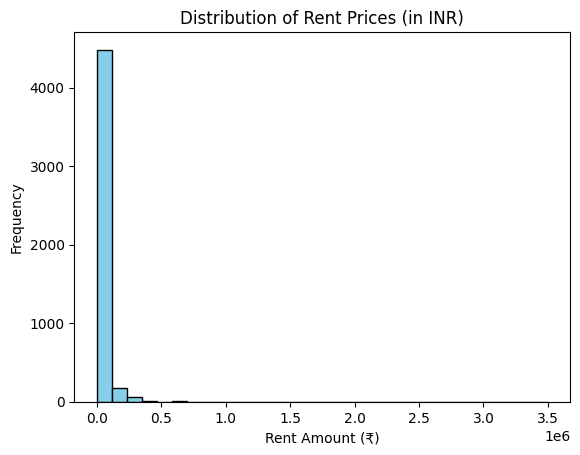

In [69]:
#distribution of rent
plt.hist(df['Rent'],bins=30,color='skyblue', edgecolor='black')
plt.title('Distribution of Rent Prices (in INR)')
plt.xlabel('Rent Amount (₹)')
plt.ylabel('Frequency')
plt.show()

In [70]:
df = df[df['Rent'] < 100000]  # Keep only realistic rents


In [71]:
df.columns


Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [72]:
#select the features you want present in the prediction model
selected_features=['BHK','Size','City','Furnishing Status', 'Bathroom']
target='Rent'

In [73]:
X=df[selected_features]
y=df['Rent']

In [74]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1,Contact Owner


In [75]:
#classify the features into categorical and numeric features
categorical_features=['City','Furnishing Status']
numeric_features=['BHK','Size','Bathroom']

In [76]:
#introduce a preprocessor that transforms the categorical features into 0 and 1 without altering the original dataset
preprocessor=ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(drop='first'),categorical_features)
    ],
    remainder='passthrough'
)

In [77]:
#Train and test the features
X=df[['BHK','Size','City','Furnishing Status', 'Bathroom']]
y=df['Rent']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
#intoduce a pipeline and linear regression algorithm
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])

In [79]:
model.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [80]:
y_pred=model.predict(X_test)

In [81]:
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

print(f"R² Score:{r2:.2f}")
print(f"RSME: ₹{rmse:,.0f}")

R² Score:0.66
RSME: ₹11,011


In [82]:
custom_data=pd.DataFrame({
    'BHK':[2],
    'Size':[900],
    'City':['Delhi'],
    'Furnishing Status':['Semi-Furnished'],
    'Bathroom':[2]
})
predicted_rent=model.predict(custom_data)
print(f"Estimated Rent:₹{predicted_rent[0]:,.0f}")
    

Estimated Rent:₹25,056


In [83]:
custom_data=pd.DataFrame({
    'BHK':[6],
    'Size':[1100],
    'City':['Kolkata'],
    'Furnishing Status':['Unfurnished'],
    'Bathroom':[2]
})
predicted_rent=model.predict(custom_data)
print(f"Estimated Rent:₹{predicted_rent[0]:,.0f}")

Estimated Rent:₹31,642


In [84]:
import joblib


In [85]:
joblib.dump(model, 'housing_model.pkl')


['housing_model.pkl']

In [87]:
from sklearn.pipeline import Pipeline

joblib.dump(Pipeline, 'housing_pipeline.pkl')


['housing_pipeline.pkl']